In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
PATH = './FashionMNIST'

In [3]:
ds = datasets.FashionMNIST(PATH, download=True)

In [4]:
data = ds.train_data.view(-1).float() / 255
m = data.mean()
s = data.std()
m, s 

(tensor(0.2860), tensor(0.3530))

In [5]:
tfms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((m,), (s,))
])

In [6]:
train_ds = datasets.FashionMNIST(PATH, transform=tfms, download=True, train=True)
test_ds = datasets.FashionMNIST(PATH, transform=tfms, download=True, train=False)

In [7]:
train_loader = DataLoader(train_ds, batch_size=600)
test_loader = DataLoader(test_ds, batch_size=600)

In [8]:
class Net(nn.Module):
    def __init__(self, lr=1e-4, l2=0.):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 1024)
        self.fc2 = nn.Linear(1024, 1024)
        self.fc3 = nn.Linear(1024, 1024)
        self.fc4 = nn.Linear(1024, 10)
        self.optim = optim.Adam(self.parameters(), lr=lr, weight_decay=l2)
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        x = F.log_softmax(x, dim=1)
        return x
    
    def loss(self, output, target, **kwargs):
        self._loss = F.nll_loss(output, target, **kwargs)
        return self._loss

In [9]:
def train(epoch, model):
    train_size = len(train_loader.sampler)
    for batch_idx, (data, target) in enumerate(train_loader):
        model.optim.zero_grad()
        output = model(data.cuda())
        loss = model.loss(output, target.cuda())
        loss.backward()
        model.optim.step()   
    else:
        batch_idx += 1
        line = 'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss  {:.6f}'.format(
            epoch, batch_idx * len(data), train_size, 100. * batch_idx / len(train_loader), model._loss.item())
        print(line)
    return model._loss.item()

In [10]:
def test(model, loader):
    test_size = len(loader.sampler)
    avg_lambda = lambda l: 'Loss: {:.4f}'.format(l)
    acc_lambda = lambda c, p: 'Accuracy: {}/{} ({:.0f}%)'.format(c, test_size, p)
    line = lambda l, c, p: ' ' + avg_lambda(l) + '\t' + acc_lambda(c, p)

    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in loader:
            data = data.cuda()
            target = target.cuda()
            output = model(data)
            test_loss += model.loss(output, target, size_average=False).item() # sum up batch loss
            _, pred = torch.max(output.data, 1)
            correct += (pred == target).sum().item()
    
    test_loss /= test_size
    correct_pct = correct / test_size
    report = 'Test set:\n' + line(test_loss, correct, 100.0 * correct_pct) + '\n'
    
    print(report)
    return test_loss, correct_pct

In [11]:
def plot():
    plt.plot(tst_losses, color='green', label="test")
    plt.plot(trn_losses, color='blue', label="train")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()
    plt.plot(tst_accuracy, color='red', label="test")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()

Train Epoch: 1 [60000/60000 (100%)]	Loss  0.473821
Test set:
 Loss: 0.5062	Accuracy: 8157/10000 (82%)

Train Epoch: 2 [60000/60000 (100%)]	Loss  0.411115
Test set:
 Loss: 0.4524	Accuracy: 8344/10000 (83%)

Train Epoch: 3 [60000/60000 (100%)]	Loss  0.354409
Test set:
 Loss: 0.4129	Accuracy: 8505/10000 (85%)

Train Epoch: 4 [60000/60000 (100%)]	Loss  0.328120
Test set:
 Loss: 0.3914	Accuracy: 8573/10000 (86%)

Train Epoch: 5 [60000/60000 (100%)]	Loss  0.310472
Test set:
 Loss: 0.3773	Accuracy: 8629/10000 (86%)

Train Epoch: 6 [60000/60000 (100%)]	Loss  0.298235
Test set:
 Loss: 0.3669	Accuracy: 8669/10000 (87%)

Train Epoch: 7 [60000/60000 (100%)]	Loss  0.288067
Test set:
 Loss: 0.3586	Accuracy: 8692/10000 (87%)

Train Epoch: 8 [60000/60000 (100%)]	Loss  0.279694
Test set:
 Loss: 0.3520	Accuracy: 8721/10000 (87%)

Train Epoch: 9 [60000/60000 (100%)]	Loss  0.271481
Test set:
 Loss: 0.3464	Accuracy: 8754/10000 (88%)

Train Epoch: 10 [60000/60000 (100%)]	Loss  0.264197
Test set:
 Loss: 0.34

Train Epoch: 80 [60000/60000 (100%)]	Loss  0.012132
Test set:
 Loss: 0.6316	Accuracy: 8902/10000 (89%)

Train Epoch: 81 [60000/60000 (100%)]	Loss  0.007490
Test set:
 Loss: 0.6453	Accuracy: 8916/10000 (89%)

Train Epoch: 82 [60000/60000 (100%)]	Loss  0.007866
Test set:
 Loss: 0.6388	Accuracy: 8916/10000 (89%)

Train Epoch: 83 [60000/60000 (100%)]	Loss  0.005705
Test set:
 Loss: 0.6462	Accuracy: 8946/10000 (89%)

Train Epoch: 84 [60000/60000 (100%)]	Loss  0.008951
Test set:
 Loss: 0.6594	Accuracy: 8965/10000 (90%)

Train Epoch: 85 [60000/60000 (100%)]	Loss  0.009383
Test set:
 Loss: 0.6570	Accuracy: 8912/10000 (89%)

Train Epoch: 86 [60000/60000 (100%)]	Loss  0.007463
Test set:
 Loss: 0.6715	Accuracy: 8912/10000 (89%)

Train Epoch: 87 [60000/60000 (100%)]	Loss  0.010681
Test set:
 Loss: 0.7096	Accuracy: 8875/10000 (89%)

Train Epoch: 88 [60000/60000 (100%)]	Loss  0.018127
Test set:
 Loss: 0.6795	Accuracy: 8886/10000 (89%)

Train Epoch: 89 [60000/60000 (100%)]	Loss  0.011769
Test set:
 L

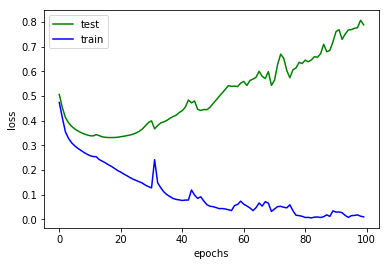

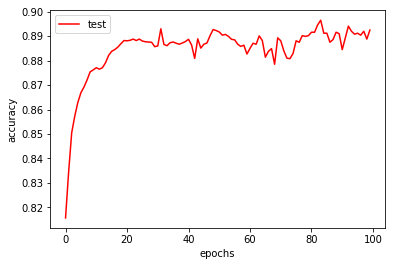

Train Epoch: 101 [60000/60000 (100%)]	Loss  0.003683
Test set:
 Loss: 0.7540	Accuracy: 8939/10000 (89%)

Train Epoch: 102 [60000/60000 (100%)]	Loss  0.004109
Test set:
 Loss: 0.8068	Accuracy: 8914/10000 (89%)

Train Epoch: 103 [60000/60000 (100%)]	Loss  0.006379
Test set:
 Loss: 0.7834	Accuracy: 8908/10000 (89%)

Train Epoch: 104 [60000/60000 (100%)]	Loss  0.004346
Test set:
 Loss: 0.8153	Accuracy: 8932/10000 (89%)

Train Epoch: 105 [60000/60000 (100%)]	Loss  0.009882
Test set:
 Loss: 0.7925	Accuracy: 8905/10000 (89%)

Train Epoch: 106 [60000/60000 (100%)]	Loss  0.010789
Test set:
 Loss: 0.7708	Accuracy: 8893/10000 (89%)

Train Epoch: 107 [60000/60000 (100%)]	Loss  0.012099
Test set:
 Loss: 0.7898	Accuracy: 8898/10000 (89%)

Train Epoch: 108 [60000/60000 (100%)]	Loss  0.006332
Test set:
 Loss: 0.8433	Accuracy: 8874/10000 (89%)

Train Epoch: 109 [60000/60000 (100%)]	Loss  0.021514
Test set:
 Loss: 0.7949	Accuracy: 8893/10000 (89%)

Train Epoch: 110 [60000/60000 (100%)]	Loss  0.028127
Te

Train Epoch: 197 [60000/60000 (100%)]	Loss  0.001336
Test set:
 Loss: 0.9231	Accuracy: 8952/10000 (90%)

Train Epoch: 198 [60000/60000 (100%)]	Loss  0.002008
Test set:
 Loss: 0.9537	Accuracy: 8922/10000 (89%)

Train Epoch: 199 [60000/60000 (100%)]	Loss  0.000732
Test set:
 Loss: 0.9362	Accuracy: 8956/10000 (90%)

Train Epoch: 200 [60000/60000 (100%)]	Loss  0.009270
Test set:
 Loss: 0.8768	Accuracy: 8941/10000 (89%)



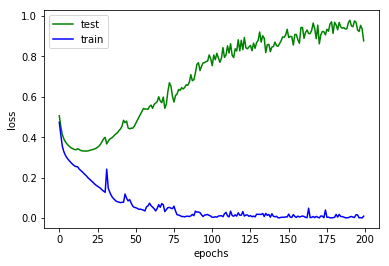

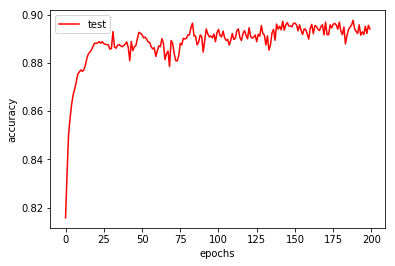

Train Epoch: 201 [60000/60000 (100%)]	Loss  0.002468
Test set:
 Loss: 0.9096	Accuracy: 8951/10000 (90%)

Train Epoch: 202 [60000/60000 (100%)]	Loss  0.003049
Test set:
 Loss: 0.9430	Accuracy: 8939/10000 (89%)

Train Epoch: 203 [60000/60000 (100%)]	Loss  0.005204
Test set:
 Loss: 0.9450	Accuracy: 8925/10000 (89%)

Train Epoch: 204 [60000/60000 (100%)]	Loss  0.007190
Test set:
 Loss: 0.9251	Accuracy: 8962/10000 (90%)

Train Epoch: 205 [60000/60000 (100%)]	Loss  0.009302
Test set:
 Loss: 0.9210	Accuracy: 8932/10000 (89%)

Train Epoch: 206 [60000/60000 (100%)]	Loss  0.007856
Test set:
 Loss: 0.9147	Accuracy: 8984/10000 (90%)

Train Epoch: 207 [60000/60000 (100%)]	Loss  0.000790
Test set:
 Loss: 0.9396	Accuracy: 8947/10000 (89%)

Train Epoch: 208 [60000/60000 (100%)]	Loss  0.002708
Test set:
 Loss: 0.9945	Accuracy: 8934/10000 (89%)

Train Epoch: 209 [60000/60000 (100%)]	Loss  0.001584
Test set:
 Loss: 0.9539	Accuracy: 8934/10000 (89%)

Train Epoch: 210 [60000/60000 (100%)]	Loss  0.004149
Te

Test set:
 Loss: 1.2074	Accuracy: 8966/10000 (90%)

Train Epoch: 280 [60000/60000 (100%)]	Loss  0.000002
Test set:
 Loss: 1.2111	Accuracy: 8966/10000 (90%)

Train Epoch: 281 [60000/60000 (100%)]	Loss  0.000001
Test set:
 Loss: 1.2147	Accuracy: 8967/10000 (90%)

Train Epoch: 282 [60000/60000 (100%)]	Loss  0.000001
Test set:
 Loss: 1.2185	Accuracy: 8968/10000 (90%)

Train Epoch: 283 [60000/60000 (100%)]	Loss  0.000001
Test set:
 Loss: 1.2222	Accuracy: 8968/10000 (90%)

Train Epoch: 284 [60000/60000 (100%)]	Loss  0.000001
Test set:
 Loss: 1.2260	Accuracy: 8968/10000 (90%)

Train Epoch: 285 [60000/60000 (100%)]	Loss  0.000001
Test set:
 Loss: 1.2298	Accuracy: 8968/10000 (90%)

Train Epoch: 286 [60000/60000 (100%)]	Loss  0.000001
Test set:
 Loss: 1.2336	Accuracy: 8968/10000 (90%)

Train Epoch: 287 [60000/60000 (100%)]	Loss  0.000001
Test set:
 Loss: 1.2374	Accuracy: 8968/10000 (90%)

Train Epoch: 288 [60000/60000 (100%)]	Loss  0.000001
Test set:
 Loss: 1.2411	Accuracy: 8967/10000 (90%)

Tra

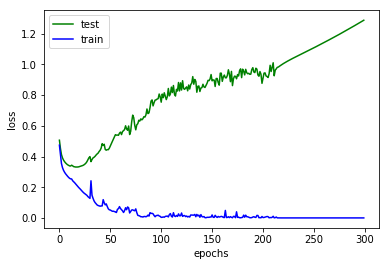

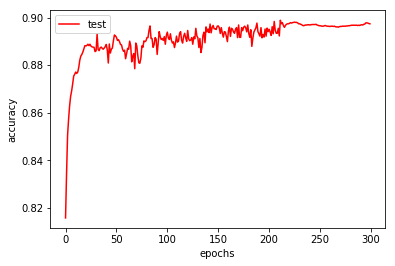

Train Epoch: 301 [60000/60000 (100%)]	Loss  0.000001
Test set:
 Loss: 1.2918	Accuracy: 8973/10000 (90%)

Train Epoch: 302 [60000/60000 (100%)]	Loss  0.000001
Test set:
 Loss: 1.2956	Accuracy: 8973/10000 (90%)

Train Epoch: 303 [60000/60000 (100%)]	Loss  0.000001
Test set:
 Loss: 1.2995	Accuracy: 8973/10000 (90%)

Train Epoch: 304 [60000/60000 (100%)]	Loss  0.000001
Test set:
 Loss: 1.3034	Accuracy: 8975/10000 (90%)

Train Epoch: 305 [60000/60000 (100%)]	Loss  0.000001
Test set:
 Loss: 1.3073	Accuracy: 8974/10000 (90%)

Train Epoch: 306 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.3111	Accuracy: 8973/10000 (90%)

Train Epoch: 307 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.3149	Accuracy: 8974/10000 (90%)

Train Epoch: 308 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.3189	Accuracy: 8972/10000 (90%)

Train Epoch: 309 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.3227	Accuracy: 8971/10000 (90%)

Train Epoch: 310 [60000/60000 (100%)]	Loss  0.000000
Te

Test set:
 Loss: 1.6505	Accuracy: 8953/10000 (90%)

Train Epoch: 380 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.6646	Accuracy: 8946/10000 (89%)

Train Epoch: 381 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.6804	Accuracy: 8946/10000 (89%)

Train Epoch: 382 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.7017	Accuracy: 8944/10000 (89%)

Train Epoch: 383 [60000/60000 (100%)]	Loss  0.031386
Test set:
 Loss: 0.9239	Accuracy: 8909/10000 (89%)

Train Epoch: 384 [60000/60000 (100%)]	Loss  0.003242
Test set:
 Loss: 0.9326	Accuracy: 8953/10000 (90%)

Train Epoch: 385 [60000/60000 (100%)]	Loss  0.001871
Test set:
 Loss: 0.9872	Accuracy: 8969/10000 (90%)

Train Epoch: 386 [60000/60000 (100%)]	Loss  0.000986
Test set:
 Loss: 0.9829	Accuracy: 8969/10000 (90%)

Train Epoch: 387 [60000/60000 (100%)]	Loss  0.000388
Test set:
 Loss: 0.9946	Accuracy: 8969/10000 (90%)

Train Epoch: 388 [60000/60000 (100%)]	Loss  0.000263
Test set:
 Loss: 1.0030	Accuracy: 8973/10000 (90%)

Tra

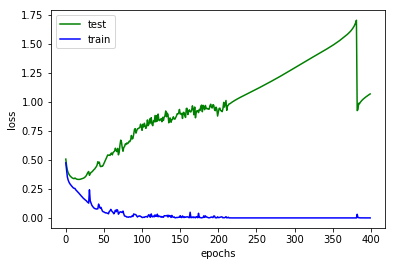

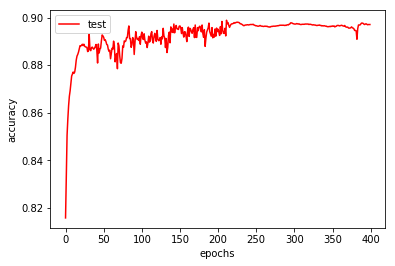

Train Epoch: 401 [60000/60000 (100%)]	Loss  0.000077
Test set:
 Loss: 1.0716	Accuracy: 8971/10000 (90%)

Train Epoch: 402 [60000/60000 (100%)]	Loss  0.000072
Test set:
 Loss: 1.0759	Accuracy: 8969/10000 (90%)

Train Epoch: 403 [60000/60000 (100%)]	Loss  0.000067
Test set:
 Loss: 1.0802	Accuracy: 8973/10000 (90%)

Train Epoch: 404 [60000/60000 (100%)]	Loss  0.000063
Test set:
 Loss: 1.0844	Accuracy: 8972/10000 (90%)

Train Epoch: 405 [60000/60000 (100%)]	Loss  0.000059
Test set:
 Loss: 1.0885	Accuracy: 8972/10000 (90%)

Train Epoch: 406 [60000/60000 (100%)]	Loss  0.000055
Test set:
 Loss: 1.0926	Accuracy: 8973/10000 (90%)

Train Epoch: 407 [60000/60000 (100%)]	Loss  0.000051
Test set:
 Loss: 1.0966	Accuracy: 8974/10000 (90%)

Train Epoch: 408 [60000/60000 (100%)]	Loss  0.000048
Test set:
 Loss: 1.1006	Accuracy: 8973/10000 (90%)

Train Epoch: 409 [60000/60000 (100%)]	Loss  0.000045
Test set:
 Loss: 1.1046	Accuracy: 8975/10000 (90%)

Train Epoch: 410 [60000/60000 (100%)]	Loss  0.000042
Te

Test set:
 Loss: 1.3749	Accuracy: 8969/10000 (90%)

Train Epoch: 480 [60000/60000 (100%)]	Loss  0.000001
Test set:
 Loss: 1.3788	Accuracy: 8970/10000 (90%)

Train Epoch: 481 [60000/60000 (100%)]	Loss  0.000001
Test set:
 Loss: 1.3827	Accuracy: 8970/10000 (90%)

Train Epoch: 482 [60000/60000 (100%)]	Loss  0.000001
Test set:
 Loss: 1.3867	Accuracy: 8972/10000 (90%)

Train Epoch: 483 [60000/60000 (100%)]	Loss  0.000001
Test set:
 Loss: 1.3907	Accuracy: 8973/10000 (90%)

Train Epoch: 484 [60000/60000 (100%)]	Loss  0.000001
Test set:
 Loss: 1.3947	Accuracy: 8973/10000 (90%)

Train Epoch: 485 [60000/60000 (100%)]	Loss  0.000001
Test set:
 Loss: 1.3987	Accuracy: 8975/10000 (90%)

Train Epoch: 486 [60000/60000 (100%)]	Loss  0.000001
Test set:
 Loss: 1.4027	Accuracy: 8974/10000 (90%)

Train Epoch: 487 [60000/60000 (100%)]	Loss  0.000001
Test set:
 Loss: 1.4067	Accuracy: 8976/10000 (90%)

Train Epoch: 488 [60000/60000 (100%)]	Loss  0.000001
Test set:
 Loss: 1.4107	Accuracy: 8976/10000 (90%)

Tra

Test set:
 Loss: 1.0779	Accuracy: 8953/10000 (90%)

Train Epoch: 575 [60000/60000 (100%)]	Loss  0.000125
Test set:
 Loss: 1.0834	Accuracy: 8952/10000 (90%)

Train Epoch: 576 [60000/60000 (100%)]	Loss  0.000114
Test set:
 Loss: 1.0886	Accuracy: 8950/10000 (90%)

Train Epoch: 577 [60000/60000 (100%)]	Loss  0.000104
Test set:
 Loss: 1.0934	Accuracy: 8949/10000 (89%)

Train Epoch: 578 [60000/60000 (100%)]	Loss  0.000096
Test set:
 Loss: 1.0981	Accuracy: 8949/10000 (89%)

Train Epoch: 579 [60000/60000 (100%)]	Loss  0.000088
Test set:
 Loss: 1.1026	Accuracy: 8952/10000 (90%)

Train Epoch: 580 [60000/60000 (100%)]	Loss  0.000082
Test set:
 Loss: 1.1068	Accuracy: 8951/10000 (90%)

Train Epoch: 581 [60000/60000 (100%)]	Loss  0.000076
Test set:
 Loss: 1.1111	Accuracy: 8952/10000 (90%)

Train Epoch: 582 [60000/60000 (100%)]	Loss  0.000071
Test set:
 Loss: 1.1152	Accuracy: 8951/10000 (90%)

Train Epoch: 583 [60000/60000 (100%)]	Loss  0.000067
Test set:
 Loss: 1.1192	Accuracy: 8950/10000 (90%)

Tra

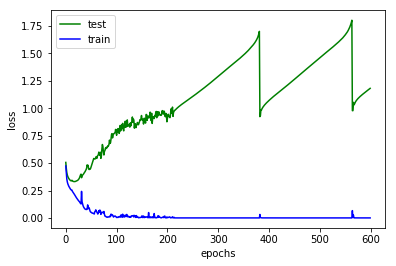

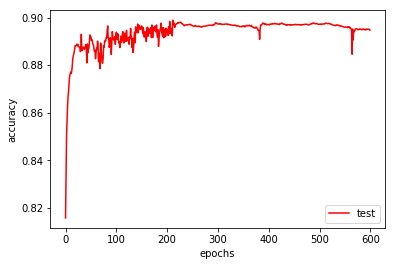

Train Epoch: 601 [60000/60000 (100%)]	Loss  0.000023
Test set:
 Loss: 1.1854	Accuracy: 8944/10000 (89%)

Train Epoch: 602 [60000/60000 (100%)]	Loss  0.000022
Test set:
 Loss: 1.1889	Accuracy: 8945/10000 (89%)

Train Epoch: 603 [60000/60000 (100%)]	Loss  0.000020
Test set:
 Loss: 1.1924	Accuracy: 8945/10000 (89%)

Train Epoch: 604 [60000/60000 (100%)]	Loss  0.000019
Test set:
 Loss: 1.1958	Accuracy: 8946/10000 (89%)

Train Epoch: 605 [60000/60000 (100%)]	Loss  0.000018
Test set:
 Loss: 1.1993	Accuracy: 8948/10000 (89%)

Train Epoch: 606 [60000/60000 (100%)]	Loss  0.000017
Test set:
 Loss: 1.2029	Accuracy: 8948/10000 (89%)

Train Epoch: 607 [60000/60000 (100%)]	Loss  0.000016
Test set:
 Loss: 1.2064	Accuracy: 8948/10000 (89%)

Train Epoch: 608 [60000/60000 (100%)]	Loss  0.000015
Test set:
 Loss: 1.2100	Accuracy: 8947/10000 (89%)

Train Epoch: 609 [60000/60000 (100%)]	Loss  0.000014
Test set:
 Loss: 1.2136	Accuracy: 8947/10000 (89%)

Train Epoch: 610 [60000/60000 (100%)]	Loss  0.000014
Te

Test set:
 Loss: 1.4835	Accuracy: 8963/10000 (90%)

Train Epoch: 680 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.4874	Accuracy: 8964/10000 (90%)

Train Epoch: 681 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.4915	Accuracy: 8963/10000 (90%)

Train Epoch: 682 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.4955	Accuracy: 8964/10000 (90%)

Train Epoch: 683 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.4995	Accuracy: 8962/10000 (90%)

Train Epoch: 684 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.5035	Accuracy: 8964/10000 (90%)

Train Epoch: 685 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.5075	Accuracy: 8963/10000 (90%)

Train Epoch: 686 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.5114	Accuracy: 8963/10000 (90%)

Train Epoch: 687 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.5154	Accuracy: 8965/10000 (90%)

Train Epoch: 688 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.5196	Accuracy: 8964/10000 (90%)

Tra

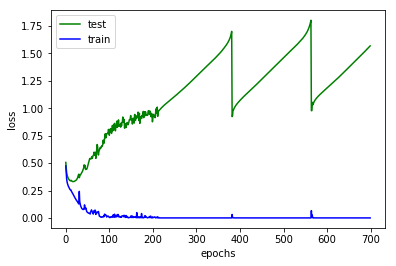

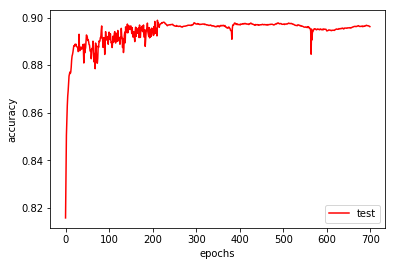

Train Epoch: 701 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.5734	Accuracy: 8961/10000 (90%)

Train Epoch: 702 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.5775	Accuracy: 8960/10000 (90%)

Train Epoch: 703 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.5817	Accuracy: 8960/10000 (90%)

Train Epoch: 704 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.5861	Accuracy: 8961/10000 (90%)

Train Epoch: 705 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.5906	Accuracy: 8960/10000 (90%)

Train Epoch: 706 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.5952	Accuracy: 8960/10000 (90%)

Train Epoch: 707 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.5999	Accuracy: 8961/10000 (90%)

Train Epoch: 708 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.6048	Accuracy: 8960/10000 (90%)

Train Epoch: 709 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.6097	Accuracy: 8959/10000 (90%)

Train Epoch: 710 [60000/60000 (100%)]	Loss  0.000000
Te

Test set:
 Loss: 1.2551	Accuracy: 8968/10000 (90%)

Train Epoch: 780 [60000/60000 (100%)]	Loss  0.000013
Test set:
 Loss: 1.2592	Accuracy: 8967/10000 (90%)

Train Epoch: 781 [60000/60000 (100%)]	Loss  0.000013
Test set:
 Loss: 1.2631	Accuracy: 8964/10000 (90%)

Train Epoch: 782 [60000/60000 (100%)]	Loss  0.000012
Test set:
 Loss: 1.2672	Accuracy: 8964/10000 (90%)

Train Epoch: 783 [60000/60000 (100%)]	Loss  0.000011
Test set:
 Loss: 1.2712	Accuracy: 8964/10000 (90%)

Train Epoch: 784 [60000/60000 (100%)]	Loss  0.000011
Test set:
 Loss: 1.2753	Accuracy: 8964/10000 (90%)

Train Epoch: 785 [60000/60000 (100%)]	Loss  0.000010
Test set:
 Loss: 1.2793	Accuracy: 8964/10000 (90%)

Train Epoch: 786 [60000/60000 (100%)]	Loss  0.000009
Test set:
 Loss: 1.2835	Accuracy: 8963/10000 (90%)

Train Epoch: 787 [60000/60000 (100%)]	Loss  0.000009
Test set:
 Loss: 1.2875	Accuracy: 8963/10000 (90%)

Train Epoch: 788 [60000/60000 (100%)]	Loss  0.000008
Train Epoch: 792 [60000/60000 (100%)]	Loss  0.000007
Te

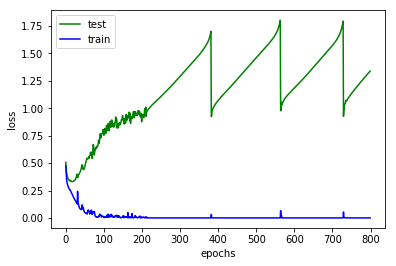

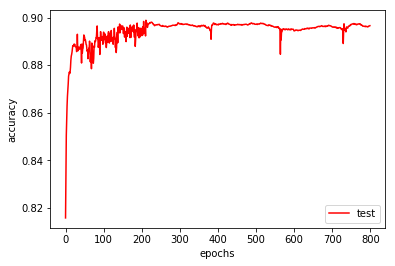

Train Epoch: 801 [60000/60000 (100%)]	Loss  0.000004
Test set:
 Loss: 1.3437	Accuracy: 8967/10000 (90%)

Train Epoch: 802 [60000/60000 (100%)]	Loss  0.000004
Test set:
 Loss: 1.3475	Accuracy: 8966/10000 (90%)

Train Epoch: 803 [60000/60000 (100%)]	Loss  0.000004
Test set:
 Loss: 1.3515	Accuracy: 8965/10000 (90%)

Train Epoch: 804 [60000/60000 (100%)]	Loss  0.000004
Test set:
 Loss: 1.3554	Accuracy: 8966/10000 (90%)

Train Epoch: 805 [60000/60000 (100%)]	Loss  0.000003
Test set:
 Loss: 1.3594	Accuracy: 8963/10000 (90%)

Train Epoch: 806 [60000/60000 (100%)]	Loss  0.000003
Test set:
 Loss: 1.3631	Accuracy: 8963/10000 (90%)

Train Epoch: 807 [60000/60000 (100%)]	Loss  0.000003
Test set:
 Loss: 1.3670	Accuracy: 8963/10000 (90%)

Train Epoch: 808 [60000/60000 (100%)]	Loss  0.000003
Test set:
 Loss: 1.3709	Accuracy: 8964/10000 (90%)

Train Epoch: 809 [60000/60000 (100%)]	Loss  0.000003
Test set:
 Loss: 1.3747	Accuracy: 8963/10000 (90%)

Train Epoch: 810 [60000/60000 (100%)]	Loss  0.000003
Te

Test set:
 Loss: 1.6766	Accuracy: 8973/10000 (90%)

Train Epoch: 880 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.6840	Accuracy: 8970/10000 (90%)

Train Epoch: 881 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.6927	Accuracy: 8970/10000 (90%)

Train Epoch: 882 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.7037	Accuracy: 8968/10000 (90%)

Train Epoch: 883 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.7139	Accuracy: 8970/10000 (90%)

Train Epoch: 884 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.7255	Accuracy: 8972/10000 (90%)

Train Epoch: 885 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.7384	Accuracy: 8966/10000 (90%)

Train Epoch: 886 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.7539	Accuracy: 8965/10000 (90%)

Train Epoch: 887 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.7706	Accuracy: 8966/10000 (90%)

Train Epoch: 888 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.7897	Accuracy: 8964/10000 (90%)

Tra

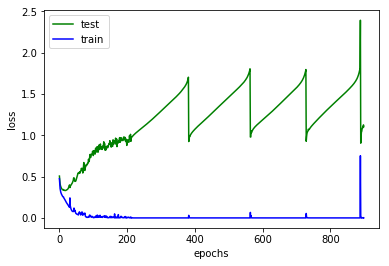

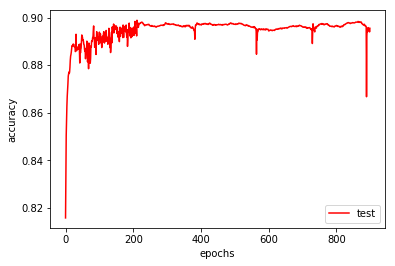

Train Epoch: 901 [60000/60000 (100%)]	Loss  0.000053
Test set:
 Loss: 1.1104	Accuracy: 8956/10000 (90%)

Train Epoch: 902 [60000/60000 (100%)]	Loss  0.000051
Test set:
 Loss: 1.1179	Accuracy: 8961/10000 (90%)

Train Epoch: 903 [60000/60000 (100%)]	Loss  0.000044
Test set:
 Loss: 1.1230	Accuracy: 8963/10000 (90%)

Train Epoch: 904 [60000/60000 (100%)]	Loss  0.000040
Test set:
 Loss: 1.1283	Accuracy: 8964/10000 (90%)

Train Epoch: 905 [60000/60000 (100%)]	Loss  0.000037
Test set:
 Loss: 1.2034	Accuracy: 8964/10000 (90%)

Train Epoch: 924 [60000/60000 (100%)]	Loss  0.000013
Test set:
 Loss: 1.2068	Accuracy: 8964/10000 (90%)

Train Epoch: 925 [60000/60000 (100%)]	Loss  0.000014
Test set:
 Loss: 1.2139	Accuracy: 8958/10000 (90%)

Train Epoch: 926 [60000/60000 (100%)]	Loss  0.000011
Test set:
 Loss: 1.2195	Accuracy: 8961/10000 (90%)

Train Epoch: 927 [60000/60000 (100%)]	Loss  0.000010
Test set:
 Loss: 1.2252	Accuracy: 8961/10000 (90%)

Train Epoch: 928 [60000/60000 (100%)]	Loss  0.000010
Te

Test set:
 Loss: 1.6009	Accuracy: 8959/10000 (90%)

Train Epoch: 998 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.6049	Accuracy: 8958/10000 (90%)

Train Epoch: 999 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.6094	Accuracy: 8958/10000 (90%)

Train Epoch: 1000 [60000/60000 (100%)]	Loss  0.000000
Test set:
 Loss: 1.6143	Accuracy: 8956/10000 (90%)



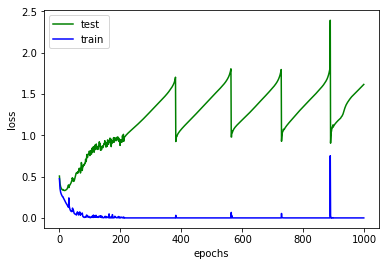

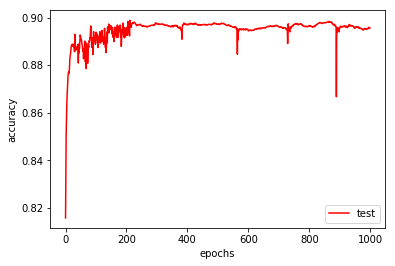

In [12]:
trn_losses = []
tst_losses = []
tst_accuracy = []
with torch.cuda.device(6) as d:
    model = Net().cuda()
    for epoch in range(1, 1001):
        model.train()
        l = train(epoch, model)
        trn_losses.append(l)
        model.eval()
        l, a = test(model, test_loader)
        tst_losses.append(l)
        tst_accuracy.append(a)
        if epoch % 100 == 0:
            plot()
        

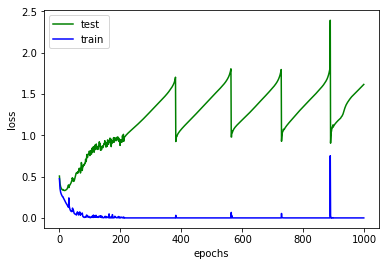

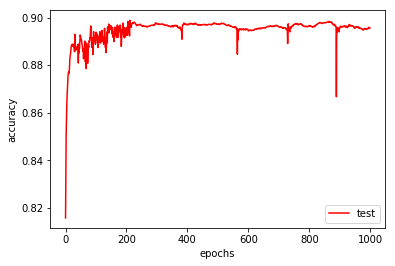

In [13]:
plot()